Poběží pomalu, celé to ještě jede na pandas.

In [1]:
import os
import json
import datetime
import warnings
import polars as pl
import pandas as pd
import altair as alt

from src.najdi_rok import najdi_rok
from src.pocet_stran import pocet_stran
from src.bez_bordelu import bez_bordelu
from src.alt_friendly import alt_friendly
from src.hezke_jmeno import hezke_jmeno
from src.kristi_promin import kristi_promin
from src.zjisti_vazbu import zjisti_vazbu
from src.me_to_neurazi import me_to_neurazi

pl.Config(tbl_rows=100)
alt.data_transformers.disable_max_rows()
alt.themes.register('irozhlas', kristi_promin)
alt.themes.enable('irozhlas')
warnings.filterwarnings('ignore')

with open(os.path.join('src','kredity.json'), 'r', encoding='utf-8') as kredity:
    kredity = json.loads(kredity.read())

In [2]:
df = pd.read_parquet(os.path.join("data","cnb_vyber.parquet"))
df = df.explode('008')
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))
df['stran'] = df['300_a'].apply(lambda x: pocet_stran(x))

In [3]:
df = df.dropna(subset=['245_a','100_a','rok'])

In [4]:
df = df[df['stran'] >= 30]

In [5]:
df = df.explode('260_b').explode('264_b')

In [6]:
def dvoje_nakladatelstvi(sedesat, sedesatctyri):
    if sedesat != None:
        return sedesat.replace(',','').replace(":",'').strip()
    elif sedesatctyri != None:
        return sedesatctyri.replace(',','').replace(":",'').strip()
    else:
        return None

In [7]:
df['nakladatel'] = df.apply(lambda row: dvoje_nakladatelstvi(row['260_b'], row['264_b']), axis=1)

In [8]:
df[(df['rok'] == 2021) & (df['nakladatel'].isnull())]

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,...,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,stran,nakladatel
001,,,,,,,,,,,,,,,,,,,,,
cpk20243582322,220106t20212021xr a f 010 0 cze d,[978-80-01-06880-9],None,[(brožováno)],"[cze, eng]",[cze],1,None,[72],[Architektura],...,[kn20010710176],[České vysoké učení technické v Praze.],[Fakulta architektury],None,None,None,cam a22 i 4500,2021.0,179.0,None
nkc20193147778,210527t20212021xr e 000 0 cze d,[978-80-270-6918-7],None,[(brožováno)],[cze],[eng],1,None,[615],[Farmacie. Farmakologie],...,None,None,None,None,None,None,nam a22 i 4500,2021.0,134.0,None
nkc20203174146,191104t20212021xr a a 000 j cze d,[978-80-7292-384-7],[349.00 Kč],[(vázáno) :],[cze],[fre],1,None,"[78.03, 0/9-053.2]","[Hudební styly, vlivy, školy, Literatura pro d...",...,None,None,None,[Zvuková knížka (Axióma)],None,None,cam a22 i 4500,2021.0,30.0,None
nkc20203239905,200727t20212021xr ab e 000 0 cze,[978-80-270-8145-5],None,[(vázáno)],None,None,None,None,[908(437)],[Vlastivěda Česka a Slovenska],...,None,None,None,None,None,None,nam a22 i 4500,2021.0,165.0,None
nkc20203241808,200811t20212021xr f 000 0 cze,[978-80-906325-5-4],None,[(brožováno)],None,None,None,None,[2],[Náboženství],...,None,None,None,None,[Granite Design - Akbar],None,nam a22 i 4500,2021.0,305.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nkc20243606473,240517t20212021xr a e f 000 0 cze,[978-80-908458-2-4],None,[(kroužková vazba)],None,None,None,None,[616.89],[Psychiatrie],...,None,None,None,None,None,None,nam a22 i 4500,2021.0,116.0,None
nkc20243606474,240517t20212021xr a e f 000 0 cze,[978-80-908458-3-1],None,[(kroužková vazba)],None,None,None,None,[649],"[Domácí péče o děti, nemocné a hosty]",...,None,None,None,None,None,None,nam a22 i 4500,2021.0,99.0,None
nkc20243606474,240517t20212021xr a e f 000 0 cze,[978-80-908458-3-1],None,[(kroužková vazba)],None,None,None,None,[649],"[Domácí péče o děti, nemocné a hosty]",...,None,None,None,None,None,None,nam a22 i 4500,2021.0,99.0,None


In [9]:
df[df['nakladatel'].notnull()].groupby('rok').size() / df.groupby('rok').size()

rok
1900.0    1.000000
1901.0    1.000000
1902.0    0.999293
1903.0    0.999237
1904.0    1.000000
            ...   
2021.0    0.924087
2022.0    0.930183
2023.0    0.927482
2024.0    0.930929
2025.0    0.945205
Length: 126, dtype: float64

In [10]:
df['nakladatel'].sample(50)

001
bk196203411                               Československý spisovatel
cpk19990699572                                               Kuklik
nkc20152664724                                            Gaudeamus
nkc20193162219                                              Malvern
nkc20102148987                       Ostravská univerzita v Ostravě
nkc20081801798                        Vernon Fine Art International
nkc20152697929                                                  VJV
nkc20233546184                                                  XYZ
nkc20183004168                                        Hypertenze.eu
cpk20233500024                    Státní pedagogické nakladatelství
bk197003899                               Československý spisovatel
nos190250041                                                J. Otto
nkc20193086773                                                 Ikar
nkc20172942839                                            Akropolis
ck8804381                                   

In [11]:
df[df['100_7'].astype(str).str.contains('jx20100301005',na=False)]

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,...,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,stran,nakladatel
001,,,,,,,,,,,,,,,,,,,,,
nkc20182997195,180516s2018 xr g 000 j cze,[978-80-7549-850-2],None,[(vázáno)],None,None,None,None,[821.162.3-3],[Česká próza],...,None,None,None,None,[Euromedia Group - Listen],None,nam a22 i 4500,2018.0,156.0,Euromedia
nkc20233549616,230925s2023 xr g 000 f cze,[978-80-7637-400-3],None,[(brožováno)],None,None,None,None,[821.162.3-3],[Česká próza],...,None,None,None,None,None,None,nam a22 i 4500,2023.0,183.0,Paseka


In [12]:
df[df['nakladatel'] == 'Listen'].sort_values(by='rok')

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,...,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,stran,nakladatel
001,,,,,,,,,,,,,,,,,,,,,
cpk19970277303,980429s1997 xr c e 000 mdcze,[80-902360-0-6],None,[(brož.)],None,None,None,None,[394],[Veřejný a společenský život. Každodenní život],...,None,None,None,None,None,None,nam a22 a 4500,1997.0,173.0,Listen
cpk19980318422,980518s1998 xr c e 000 m cze,[80-902360-1-4],None,[(váz.)],None,None,None,None,[316.4/.7],[Sociální interakce. Sociální komunikace],...,None,None,None,None,None,None,nam a22 a 4500,1998.0,111.0,Listen
cpk19990738645,990927s1999 xr acf e 000 macze,[80-902360-2-2],None,[(váz.)],None,None,None,None,"[7.01/.09, 929]","[Umění, Biografie]",...,None,None,None,None,None,None,nam a22 a 4500,1999.0,117.0,Listen
cpk20000703085,000505s2000 xr af e 000 macze,[80-902360-3-0],None,[(váz.)],None,None,None,None,[929],[Biografie],...,None,None,None,None,None,None,cam a22 a 4500,2000.0,127.0,Listen
cpk20000980115,010201s2000 xr ac e 000 mdcze,[80-902360-4-9],None,[(váz.)],None,None,None,None,[929],[Biografie],...,None,None,None,None,None,None,nam a22 a 4500,2000.0,133.0,Listen
cpk20000985749,010216s2000 xr a e 000 macze,[80-902360-5-7],None,[(váz.)],None,None,None,None,[929],[Biografie],...,None,None,None,None,None,None,nam a22 a 4500,2000.0,117.0,Listen
cpk20021186037,021125s2002 xr c e 000 0ccze,[80-86526-00-3],None,[(váz.)],None,None,None,None,[929.5/.9],[Genealogie. Heraldika. Šlechta. Vlajky],...,None,None,None,None,None,None,nam a22 a 4500,2002.0,141.0,Listen
cpk20031190707,030721s2002 xr c e 000 macze,[80-86526-01-1],None,[(váz.)],None,None,None,None,[929],[Biografie],...,None,None,None,None,None,None,nam a22 a 4500,2002.0,188.0,Listen
cpk20031244955,030819s2002 xr e 000 1 cze,[80-86526-02-X],None,[(váz.)],None,None,None,None,[821.162.3-3],[Česká próza],...,None,None,None,None,None,None,nam a22 a 4500,2002.0,254.0,Listen


In [13]:
df[df['nakladatel'] == 'Paseka'].sort_values(by='rok')

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,...,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,stran,nakladatel
001,,,,,,,,,,,,,,,,,,,,,
ck9104408,911009s1990 xr a e 000 f cze,[80-85192-01-2],None,[(vázáno)],None,None,None,None,[821.162.3-3],[Česká próza],...,None,None,None,None,None,"[Klíma, Ladislav (spisovatel a filozof čes., 1...",nam a22 i 4500,1990.0,203.0,Paseka
cpk20000533892,910220s1990 xr ac e 001 0 cze,[80-85192-03-9],"[Kčs 39,00]",[(váz.) :],None,None,None,None,[641],[Kuchařství. Potraviny. Vařená jídla],...,None,None,None,None,None,None,nam a22 a 4500,1990.0,330.0,Paseka
nkc20070535080,920805s1990 xr a g 000 f cze,[80-85192-05-5],"[Kčs 24,00]",[(váz.) :],None,None,None,None,[821.162.3-3],[Česká próza],...,None,None,None,None,None,None,nam a22 a 4500,1990.0,101.0,Paseka
np9433293,950103s1990 xr a g 000 f cze,[80-85192-00-4],"[Kčs 37,00]",[(vázáno) :],None,None,None,None,[821.162.3-3],[Česká próza],...,None,None,None,None,None,None,nam a22 i 4500,1990.0,318.0,Paseka
ck9104917,910924s1991 xr a g 000 j cze,[80-85192-07-1],"[Kčs 35,00]",[(váz.) :],None,None,None,None,[821-31/-34],"[Milostná, dobrodružná, fantastická próza]",...,None,None,None,None,None,None,nam a22 a 4500,1991.0,159.0,Paseka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nkc20243628719,240830s2024 xr a a 000 j cze,[978-80-7637-486-7],None,[(vázáno)],[cze],[lit],1,None,"[821.17, 821-93]","[Baltské literatury, Literatura pro děti a mlá...",...,None,None,None,None,None,None,nam a22 i 4500,2024.0,48.0,Paseka
nkc20243627155,240819s2024 xr g 000 f cze,[978-80-7637-491-1],None,[(vázáno)],[cze],[rus],1,None,[821.161.1],"[Ruská literatura, rusky psaná]",...,None,None,None,None,None,None,nam a22 i 4500,2024.0,194.0,Paseka
nkc20243631758,240916s2024 xr g 000 f cze,[978-80-7637-517-8],None,[(vázáno)],[cze],[fre],1,None,[821.133.1-3],"[Francouzská próza, francouzsky psaná]",...,None,None,None,None,None,None,nam a22 i 4500,2024.0,331.0,Paseka


## Nejproduktivnější nakladatelství

In [15]:
df.groupby('nakladatel').size().nlargest(60)

nakladatel
SPN                                  21683
SNTL                                 13084
MOBA                                  9348
Mladá fronta                          7820
Albatros                              6883
Československý spisovatel             6053
Grada                                 5962
Práce                                 5362
Naše vojsko                           5255
Orbis                                 4960
Knižní klub                           4882
ČVUT                                  4693
Dilia                                 4625
Ikar                                  4569
Ivo Železný                           4422
Odeon                                 4088
Státní pedagogické nakladatelství     4021
Academia                              3963
Svoboda                               3806
Fragment                              3761
Argo                                  3601
Portál                                3331
Computer Press                        3189


In [16]:
df[df['rok'] > 2013].groupby('nakladatel').size().nlargest(60)

nakladatel
MOBA                                           3830
Euromedia Group                                2673
Dobrovský s.r.o.                               2372
Argo                                           1941
Fragment                                       1936
CPress                                         1840
Ikar                                           1686
Albatros                                       1611
Host                                           1340
Mladá fronta                                   1334
Grada                                          1246
Portál                                         1177
Knižní klub                                    1112
Grada Publishing                               1056
Nová Forma                                     1000
Wolters Kluwer                                  917
Univerzita Palackého v Olomouci                 890
Academia                                        881
Baronet                                         871
C

## Počet jednotlivých nakladatelství

<Axes: xlabel='rok'>

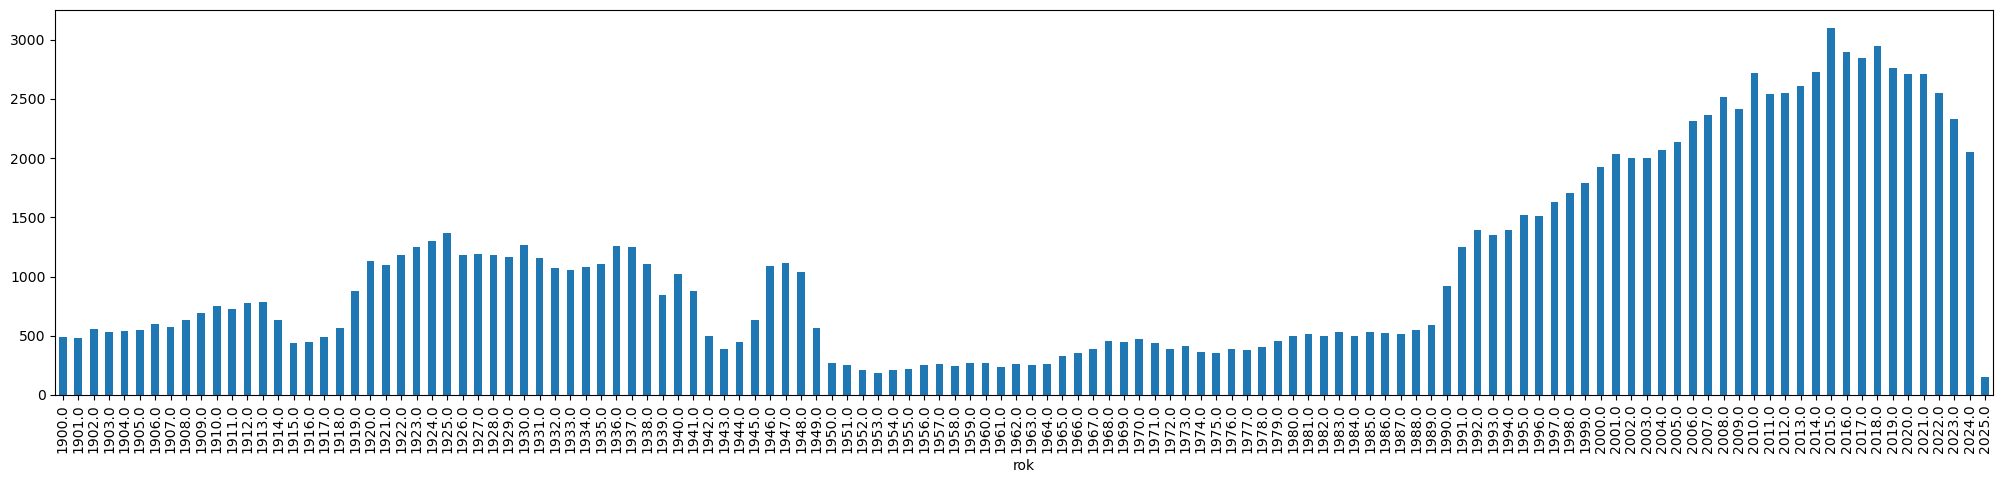

In [18]:
df.groupby('rok')['nakladatel'].nunique().plot.bar(figsize=(25,5))

In [19]:
df.groupby('rok')['nakladatel'].nunique().nlargest()

rok
2015.0    3096
2018.0    2945
2016.0    2897
2017.0    2845
2019.0    2758
Name: nakladatel, dtype: int64

In [20]:
df[df['rok'] == 1953].groupby('nakladatel').size().nlargest(15)

nakladatel
SPN                                           576
SNTL                                          317
Orbis                                         210
Práce                                         189
Československý spisovatel                     170
Naše vojsko                                   147
SZN                                           125
Nakladatelství Československé akademie věd    121
Státní pedagogické nakladatelství             119
SNKLHU                                        111
ČDLJ                                          111
SNDK                                           98
SZdN                                           87
Mladá fronta                                   86
SNPL                                           77
dtype: int64

## Počet nových nakladatelství

<Axes: xlabel='rok'>

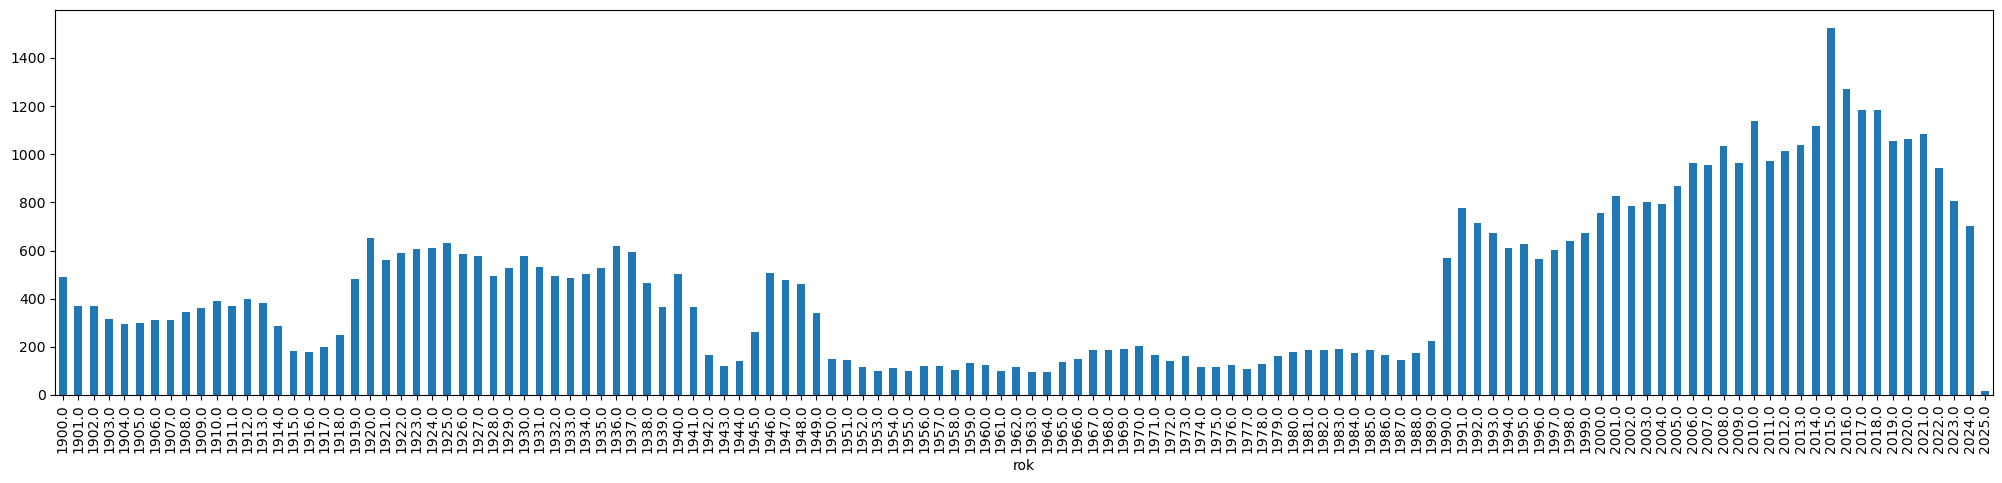

In [22]:
pd.DataFrame(df.groupby('nakladatel')['rok'].min()).groupby('rok').size().plot.bar(figsize=(25,5))

## Počet končících nakladatelství

<Axes: xlabel='rok'>

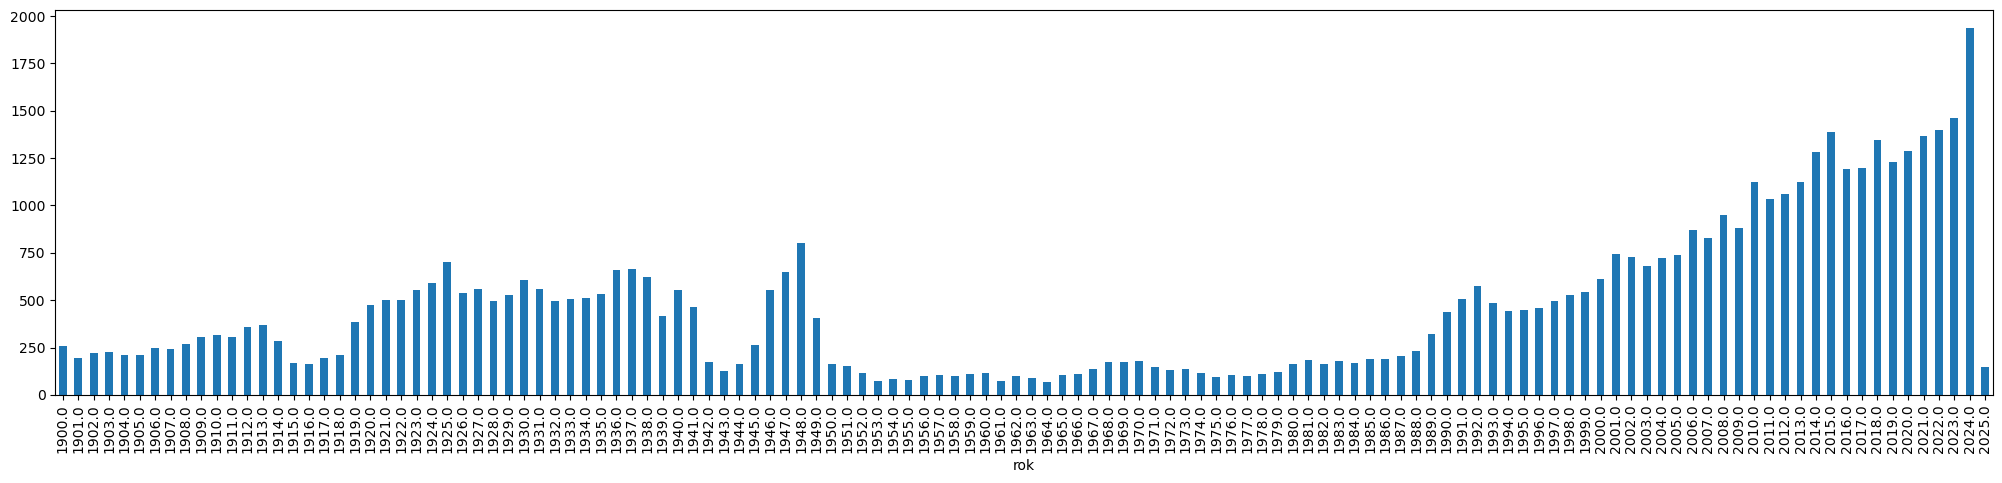

In [24]:
pd.DataFrame(df.groupby('nakladatel')['rok'].max()).groupby('rok').size().plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

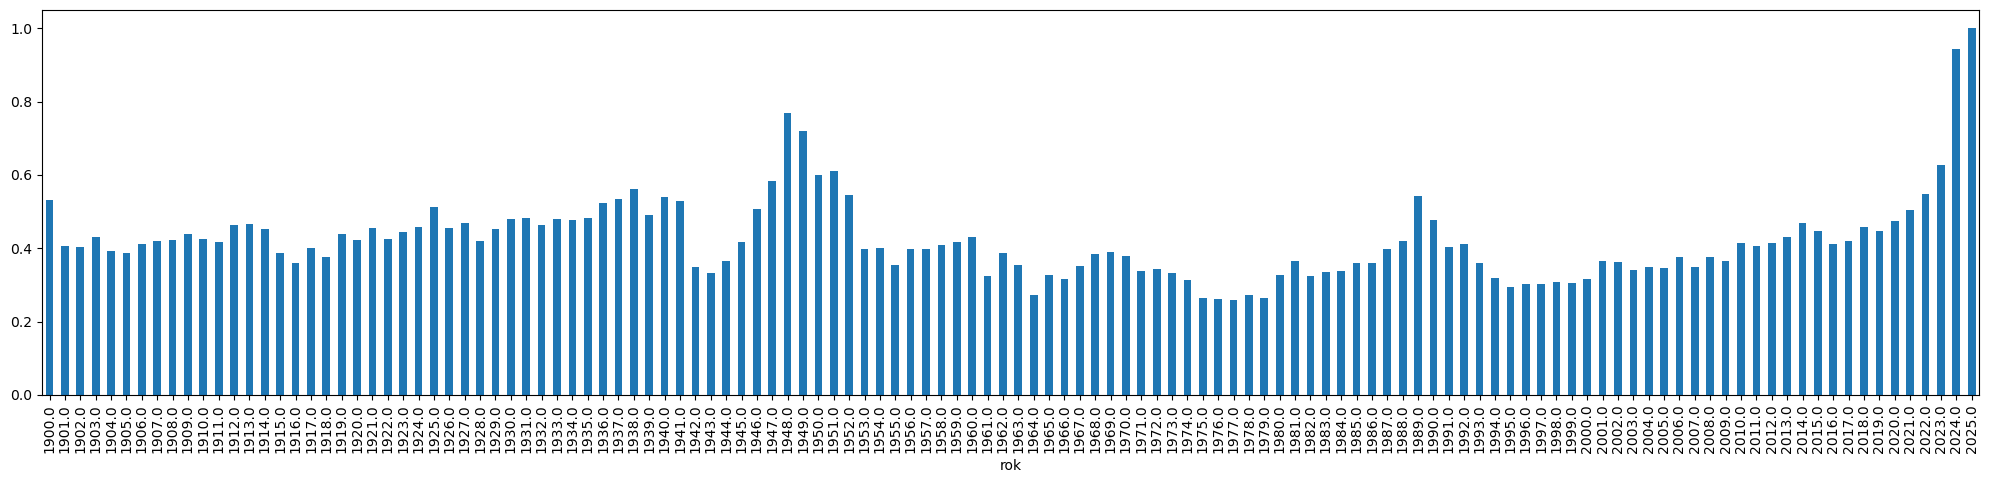

In [115]:
podil_koncicich = (pd.DataFrame(df.groupby('nakladatel')['rok'].max()).groupby('rok').size() / df.groupby('rok')['nakladatel'].nunique())
podil_koncicich.plot.bar(figsize=(25,5))

In [119]:
podil_koncicich.median()

0.41001091454373434

In [129]:
podil_koncicich.tail(16).head(10).median()

0.42607788080183695

In [26]:
(pd.DataFrame(df.groupby('nakladatel')['rok'].max()).groupby('rok').size() / df.groupby('rok')['nakladatel'].nunique()).nlargest(10)

rok
2025.0    1.000000
2024.0    0.942523
1948.0    0.769231
1949.0    0.719577
2023.0    0.626930
1951.0    0.609562
1950.0    0.600733
1947.0    0.583483
1938.0    0.561594
2022.0    0.546808
dtype: float64

In [27]:
pd.DataFrame(df[df['rok'] < 1990].groupby('nakladatel')['rok'].max()).groupby('rok').size().nlargest(5)

rok
1948.0    826
1925.0    708
1937.0    683
1947.0    672
1936.0    665
dtype: int64

In [28]:
pd.DataFrame(df.groupby('nakladatel')['rok'].max()).groupby('rok').size()

rok
1900.0     261
1901.0     197
1902.0     223
1903.0     227
1904.0     212
          ... 
2021.0    1369
2022.0    1396
2023.0    1462
2024.0    1935
2025.0     148
Length: 126, dtype: int64

## Grafy

In [30]:
import altair as alt

In [31]:
nakladatelstvi_s_tremi_knihami = df.groupby("nakladatel").size()
nakladatelstvi_s_tremi_knihami = nakladatelstvi_s_tremi_knihami[nakladatelstvi_s_tremi_knihami >= 3].index.to_list()
df_aspon_tri = df[df['nakladatel'].isin(nakladatelstvi_s_tremi_knihami)]

In [32]:
slov = {
    'celkem':'Nakladatelství celkem',
    'nova':'Nová nakladatelství',
    'koncici':'Nakladatelství, která vydala svoji (k roku 2025) poslední knihu'
}

jednotliva = pd.DataFrame(df_aspon_tri.groupby('rok')['nakladatel'].nunique()).reset_index().rename(columns={"nakladatel": slov['celkem']})
nova = pd.DataFrame(df_aspon_tri.groupby('nakladatel')['rok'].min()).groupby('rok').size().reset_index().rename(columns={0: slov['nova']})
koncici = pd.DataFrame(df_aspon_tri.groupby('nakladatel')['rok'].max()).groupby('rok').size().reset_index().rename(columns={0: slov['koncici']})
do_grafu = jednotliva.merge(nova, on="rok", how="left")
do_grafu = do_grafu.merge(koncici, on="rok", how="left")
do_grafu = do_grafu.melt(id_vars="rok")
do_grafu = do_grafu[do_grafu['rok'] >= 1900]
do_grafu = do_grafu[((do_grafu['rok'] <= 2023) & (do_grafu['variable'].isin([slov['nova'], slov['celkem']])) | ((do_grafu['rok'] <= 2022) & (do_grafu['variable'] == slov['koncici'])))]
do_grafu['rok'] = pd.to_datetime(do_grafu['rok'].apply(lambda x: f"{int(x)}-01-01"))
do_grafu

,rok,variable,value
0,1900-01-01,Nakladatelství celkem,197.0
1,1901-01-01,Nakladatelství celkem,255.0
2,1902-01-01,Nakladatelství celkem,302.0
3,1903-01-01,Nakladatelství celkem,289.0
4,1904-01-01,Nakladatelství celkem,302.0
...,...,...,...
370,2018-01-01,"Nakladatelství, která vydala svoji (k roku 202...",307.0
371,2019-01-01,"Nakladatelství, která vydala svoji (k roku 202...",300.0
372,2020-01-01,"Nakladatelství, která vydala svoji (k roku 202...",316.0
373,2021-01-01,"Nakladatelství, která vydala svoji (k roku 202...",361.0


In [33]:
alt.Chart(do_grafu).mark_line().encode(
    x='rok:T',
    y='value:Q',
    color='variable:N',
)

alt.Chart(...)

In [34]:
from textwrap import wrap

In [35]:
titulek='Kolik různých nakladatelství vydávalo knihy'
podtitulek="Nejhůř poznamenaly pestrost nakladatelské scény nacistická okupace a komunistický režim. Do grafu se promítají pouze nakladatelství tří a více knih."
podtitulek=wrap(podtitulek, 60)

In [394]:
# First, let's create a condition for the opacity
# We need to transform the data to add an opacity column for the "Končící" row

# Create a copy of the data
import pandas as pd
import altair as alt

# Assuming do_grafu is your original dataframe
fading_data = do_grafu.copy()

# Add opacity column based on year and variable
def calculate_opacity(row):
    if row['variable'] == slov['koncici']:
        # For years up to 2010, opacity is 1 (fully visible)
        if row['rok'].year <= 2000:
            return 1.0
        # For years between 2010 and 2024, opacity gradually decreases
        elif row['rok'].year <= 2024:
            # Linear interpolation from 1.0 at 2010 to 0.0 at 2024
            return 1.0 - ((row['rok'].year - 2000) / 50.0)
        # For years after 2024, opacity is 0 (fully transparent)
        else:
            return 0.0
    # For other variables, opacity is always 1 (fully visible)
    else:
        return 1.0

# Apply the function to create a new 'opacity' column
fading_data['opacity'] = fading_data.apply(calculate_opacity, axis=1)

# Now create the modified chart using the new opacity column
graf_nakl = alt.Chart(
    fading_data, 
    title=alt.Title(
        titulek,
        subtitle=['Nejpestřejší byla nakladatelská scéna v 90. letech a za první republiky.',
                  'Grafy zobrazují pouze nakladatele alespoň tří knih, čímž se odfiltrovala',
                  'většina samonakladatelů a zvláštních nakladatelských spoluprací.']
    )
).mark_bar(width=2).encode(
    alt.X("rok:T", 
          title=None,
          axis=alt.Axis(domainOpacity=0, tickColor='#DCDDD6')
    ),
    alt.Y('value:Q', 
          axis=alt.Axis(domainOpacity=0, tickCount=2, tickColor='#DCDDD6', orient='right', labelExpr='replace(datum.label, ",000", " tis.")'), 
          title=None
    ),
    alt.Color("variable:N", 
              scale=alt.Scale(range=['#D55F50', '#ECD410', '#9CA545']),
              title=None, 
              legend=None
    ),
    # Apply opacity based on the new column
    opacity=alt.Opacity('opacity:Q',title=None,legend=None),
    row=alt.Row(
        "variable:N", 
        title=None, 
        spacing=15, 
        header=alt.Header(
            labelAngle=0, 
            labelAlign='left', 
            labelAnchor='start', 
            labelFontWeight=400, 
            labelFont='Asap', 
            labelOrient="top",
            labelPadding=0
        ),
        sort=[slov['celkem'],slov['nova'],slov['koncici']],
    )
).properties(
    width=kredity['sirka'], 
    height=kredity['vyska_nizkych'], 
    autosize={'type': 'fit', 'contains': 'padding'}
).resolve_axis(
    x='independent'
).resolve_scale(
    y='shared'
).configure_view(
    stroke='transparent'
).configure_axisX(
    grid=False, 
    domain=False
)

graf_nakl

alt.Chart(...)

In [37]:
me_to_neurazi(graf_nakl, soubor="01_nakladatelstvi_pocty", kredity=kredity['default'])

<figure>
    <a href="https://data.irozhlas.cz/knihy-grafy/01_nakladatelstvi_pocty.svg" target="_blank">
    <img src="https://data.irozhlas.cz/knihy-grafy/01_nakladatelstvi_pocty.svg" width="100%" alt="Graf s titulkem „Kolik různých nakladatelství vydávalo knihy“. Další texty by měly být čitelné ze zdrojového souboru SVG." />
    </a>
    </figure>


In [38]:
import polars as pl

In [310]:
df.sample(5)

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,...,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,stran,nakladatel
001,,,,,,,,,,,,,,,,,,,,,
bk198105314,951220s1981 xr ||| | cze,None,"[Kčs 9,00]",[(Brož.) :],None,None,None,None,None,None,...,None,None,None,None,None,"[Hálek, Ivan (1872-1945 lékař čes.) - působení...",nam a22 1 4500,1981.0,159.0,Avicenum
bk196800318,970512s1968 xr cze,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,nam a22 1 4500,1968.0,305.0,Československý spisovatel
bk195701028,980910s1957 xr e f 00| 0 cze,None,None,None,None,None,None,None,[37.09],[Organizace výuky a vzdělávání],...,None,None,None,[Na pomoc učiteli],None,None,nam a22 1 4500,1957.0,77.0,SPN
ck9205963,930310s1992 xr acfh 001 cze,[80-206-0303-4],None,[(váz.)],[cze],"[eng, heb]",1,None,None,None,...,None,None,None,None,None,[Židé evropští - holocaust - Osvětim-Březinka ...,nam a22 a 4500,1992.0,140.0,Naše vojsko
cpk19960166228,970327s1996 xr a e 000 0 cze,[80-7178-113-4],"[Kč 135,00]",[(brož.) :],[cze],[eng],1,None,[37.016],[Učební osnovy. Vyučovací předměty. Učebnice],...,None,None,None,None,None,None,nam a22 a 4500,1996.0,102.0,Portál


### Podíl největšího

In [318]:
df['nakladatel'].drop_duplicates().to_list()

['Min. školství a osvěty',
 'BonArt',
 'Naše vojsko',
 'SNKLHU',
 'Československý spisovatel',
 'Družstvo Moravského kola spisovatelů',
 'Frant. Šupka',
 'Jiří Chvojka',
 'Svoboda',
 'Pavel Prokop',
 'Okresní sbor osvětový',
 'Aventinum',
 'K. Ausobský',
 'Edice Psyche',
 'Nákladem Čestné legie Československa',
 'Unie',
 'nákl.vl.',
 'Družstvo Máj',
 '[Petr Pospíšil]',
 'Vlast',
 'Okresní výkonný výbor českoslov. soc. demokracie',
 'nákladem České grafické unie a.s.',
 'Česká ročenka',
 'Min. zemědělství',
 'Ministerstvo zemědělství',
 'B. Kočí',
 'Komunistické nakladatelství a knihkupectví',
 'Stanislav Klika',
 'Jednota českosl. matemat. a fys.',
 'nákladem vlastním',
 '[J. Veselý',
 'J. Lorenz',
 'nákladem J.V. Mangla',
 'K. Šolc',
 'F. Uhlíř',
 'F. Topič',
 'Jednota českoslov. matematiků a fysiků',
 'Jos.R. Vilímek',
 'Spolek úředníků důchodkové kontroly v Čechách',
 'Profesorské nakladatelství a knihkupectví',
 'Náklad. vlastním',
 'Ústav pro stavbu měst při M.A.P.',
 'Fr. Řivnáč 

In [322]:
df['nakladatel'].drop_duplicates().to_list()

['Min. školství a osvěty',
 'BonArt',
 'Naše vojsko',
 'SNKLHU',
 'Československý spisovatel',
 'Družstvo Moravského kola spisovatelů',
 'Frant. Šupka',
 'Jiří Chvojka',
 'Svoboda',
 'Pavel Prokop',
 'Okresní sbor osvětový',
 'Aventinum',
 'K. Ausobský',
 'Edice Psyche',
 'Nákladem Čestné legie Československa',
 'Unie',
 'nákl.vl.',
 'Družstvo Máj',
 '[Petr Pospíšil]',
 'Vlast',
 'Okresní výkonný výbor českoslov. soc. demokracie',
 'nákladem České grafické unie a.s.',
 'Česká ročenka',
 'Min. zemědělství',
 'Ministerstvo zemědělství',
 'B. Kočí',
 'Komunistické nakladatelství a knihkupectví',
 'Stanislav Klika',
 'Jednota českosl. matemat. a fys.',
 'nákladem vlastním',
 '[J. Veselý',
 'J. Lorenz',
 'nákladem J.V. Mangla',
 'K. Šolc',
 'F. Uhlíř',
 'F. Topič',
 'Jednota českoslov. matematiků a fysiků',
 'Jos.R. Vilímek',
 'Spolek úředníků důchodkové kontroly v Čechách',
 'Profesorské nakladatelství a knihkupectví',
 'Náklad. vlastním',
 'Ústav pro stavbu měst při M.A.P.',
 'Fr. Řivnáč 

In [368]:
spn = ['Stát. pedagog. nakl.','Státná pedagogické nakladatelství','Státní pedagogické nakladatelství','Státní pedagogické nakladatelství n. p.','Státní pedagogické nakladatelství pro Univerzitu Karlovu']
spn_nahr = {x: 'SPN' for x in spn}

euromed = ['Odeon','Ikar','Universum','YOLI','Esence','Pragma','Pikola','Kalibr','Listen','Laser','Brána','Listen ;','Euromedia Group - Ikar','Euromedia Group - Ikar a Knižní klub','Knižní klub [i.e. Ikar]','Ikar [i.e. Knižní klub]','Euromedia Group a.s. - Ikar','Euromedia Group a.s. v edici Pragma','Knižní klub','Pragma ;']
euromed_nahr = {x: 'Euromedia' for x in euromed}

alb = [x for x in df['nakladatel'].drop_duplicates().to_list() if x is not None and "Albatros" in x]
fragm = [x for x in df['nakladatel'].drop_duplicates().to_list() if x is not None and "Fragme" in x]
cpress = [x for x in df['nakladatel'].drop_duplicates().to_list() if x is not None and (("CPre" in x) or ("Computer Press" in x))]
bizb = [x for x in df['nakladatel'].drop_duplicates().to_list() if x is not None and "BizBo" in x]
motto = [x for x in df['nakladatel'].drop_duplicates().to_list() if x is not None and "motto" in x.lower()]
edika = [x for x in df['nakladatel'].drop_duplicates().to_list() if x is not None and "Edika" in x]
albatros = ['Kniha Zlín','Egmont'] + alb + fragm + cpress + bizb + motto + edika
albatros_nahr = {x: 'Albatros' for x in albatros}

In [336]:
spn_nahr

{'Stát. pedagog. nakl.': 'SPN',
 'Státná pedagogické nakladatelství': 'SPN',
 'Státní pedagogické nakladatelství': 'SPN',
 'Státní pedagogické nakladatelství n. p.': 'SPN',
 'Státní pedagogické nakladatelství pro Univerzitu Karlovu': 'SPN'}

In [378]:
nakl = df[df['stran'] >= 30]
nakl1 = nakl[nakl['rok'] < 1999]
nakl1['nakladatel'] = nakl1['nakladatel'].replace(spn_nahr)
nakl2 = nakl[nakl['rok'] >= 1999]
nakl2['nakladatel'] = nakl2['nakladatel'].replace(euromed_nahr).replace(albatros_nahr)
nakl = pd.concat([nakl1, nakl2])

nakl = nakl.groupby(["nakladatel","rok"]).size().reset_index().rename(columns={0: 'knih'})
knih_za_rok = nakl.groupby("rok")["knih"].sum().reset_index().rename(columns={'knih': 'celkem'})
nakl = nakl.merge(knih_za_rok, on="rok", how="left")
nakl['podíl'] = nakl['knih'] / nakl['celkem']
nakl[nakl['knih'] > 10].sample(10)

,nakladatel,rok,knih,celkem,podíl
95740,Talpress,1993.0,22,6936,0.003172
15949,Dona,1997.0,19,8946,0.002124
101181,Univerzita Pardubice,2002.0,31,9776,0.003171
28889,Horizont,1983.0,38,4203,0.009041
77798,Pražská imaginace,1992.0,36,6054,0.005946
3710,Albatros,1970.0,108,3646,0.029622
25827,Galén,2020.0,40,10797,0.003705
133366,Šolc a Šimáček,1935.0,22,3098,0.007101
37214,Jihočeské nakladatelství,1988.0,13,4600,0.002826
28883,Horizont,1977.0,45,3838,0.011725


In [392]:
nakl[nakl['nakladatel'].str.contains('vlastní')].sample(10)

,nakladatel,rok,knih,celkem,podíl
119476,nákladem [vlastním,1940.0,1,3332,0.000300
116164,[nákladem vlastním],2020.0,2,10797,0.000185
122872,vlastním nákladem vydal autor,2018.0,1,11927,0.000084
104298,Vladimír Šiške vlastním nákladem,2018.0,1,11927,0.000084
122904,vlastním nákladem vydali dědicové Hany Bořkovcové,2019.0,1,11622,0.000086
54053,Mgr. Jana Podzemná vlastním nákladem,2020.0,1,10797,0.000093
123012,vydal vlastním nákladem Václav Tomsa,1928.0,1,3325,0.000301
65660,Nákladem vlastním,1901.0,2,1198,0.001669
122847,vlastním nákladem vydal Jiří Duchoň,2020.0,1,10797,0.000093
120021,nákladem vlastním,1948.0,26,3680,0.007065


In [350]:
nakl.sort_values(by='podíl', ascending=False)

,nakladatel,rok,knih,celkem,podíl
84476,SPN,1961.0,853,3739,0.228136
84480,SPN,1965.0,752,3395,0.221502
84475,SPN,1960.0,815,3685,0.221167
84477,SPN,1962.0,756,3526,0.214407
71948,Orbis,1943.0,316,1485,0.212795
...,...,...,...,...,...
74597,Pavel Mervart a Fakulta humanitních studií Uni...,2015.0,1,12219,0.000082
82544,Respekt a tolerance,2015.0,1,12219,0.000082
40937,Kaplicky Centre,2015.0,1,12219,0.000082
82565,Retida spol. s r.o.,2015.0,1,12219,0.000082


In [352]:
samonaklad = ['nákladem vlastním','nákl. vlast.','nákl. vl.']

In [354]:
nakl[nakl['nakladatel'].str.contains('Albatr')].sort_values(by='rok').tail(20)

,nakladatel,rok,knih,celkem,podíl
3746,Albatros,2006.0,573,11194,0.051188
3747,Albatros,2007.0,606,11732,0.051654
3748,Albatros,2008.0,572,12179,0.046966
3749,Albatros,2009.0,573,11527,0.049709
3750,Albatros,2010.0,528,11930,0.044258
3751,Albatros,2011.0,600,11922,0.050327
3752,Albatros,2012.0,610,11599,0.052591
3753,Albatros,2013.0,610,11801,0.051691
3754,Albatros,2014.0,605,11754,0.051472
3755,Albatros,2015.0,592,12219,0.048449


In [263]:
nakl[nakl['nakladatel'] == 'Listen']

,nakladatel,rok,knih,celkem,podíl
49078,Listen,1997.0,1,8946,0.000112
49079,Listen,1998.0,1,9012,0.000111


In [379]:
result = nakl[~nakl['nakladatel'].isin(samonaklad)].sort_values(['rok', 'podíl'], ascending=[True, False]).drop_duplicates('rok')
result = result[result['rok'].isin(range(1900,2024))]
result['rok'] = pd.to_datetime(result['rok'].apply(lambda x: f"{int(x)}-01-01"))
result = result.replace({'IŽ': 'Železný','Ivo Železný':'Železný','Euromedia Group':'Euromedia'})
nejcastejsi = result.groupby('nakladatel').size() 
nejcastejsi = nejcastejsi[nejcastejsi >=4 ].index.to_list()
nejcastejsi=['SPN','MOBA','Železný','Euromedia','Orbis','Albatros']
nenahrazeni = {x : x for x in nejcastejsi}
result = pl.from_pandas(result).with_columns(pl.col('nakladatel').replace_strict(nenahrazeni, default='jiné')).to_pandas()
result

,nakladatel,rok,knih,celkem,podíl
0,jiné,1900-01-01,35,1019,0.034347
1,jiné,1901-01-01,61,1198,0.050918
2,jiné,1902-01-01,85,1413,0.060156
3,jiné,1903-01-01,80,1309,0.061115
4,jiné,1904-01-01,55,1242,0.044283
...,...,...,...,...,...
119,Albatros,2019-01-01,826,11622,0.071072
120,Albatros,2020-01-01,658,10797,0.060943
121,Albatros,2021-01-01,760,11053,0.068760
122,Albatros,2022-01-01,951,11378,0.083582


In [362]:
result['nakladatel'].nunique()

6

In [269]:
razeni = result['nakladatel'].drop_duplicates().to_list()

In [271]:
titulek2 = "Podíl největšího nakladatelství na vydaných knihách"
podtitulek2 = wrap("Za první republiky vydávali nejvíce knih střídavě J. Otto, B. Kočí, Jos. R. Vilímek a Fr. Švejda, často se také na první příčce objevoval samonáklad. Monopol Státního pedagogického nakladatelství za socialismu krátkodobě narušovalo Státní nakladatelství technické knihy. Po revoluci se krátkodobě prosadila nakladatelství Harlequin, BB art, Grada a univerzitní nakladatelství ČVUT a UPOL.",70)

In [417]:
graf_nejvesi = alt.Chart(result, title=alt.Title(
    "Podíl největších nakladatelství na vydaných knihách",
    subtitle="Podíly Euromedia a Albatrosu po roce 1999 zahrnují i jimi vlastněné menší značky."
)).mark_bar(width=2).encode(
    alt.X("rok:T", 
          title=None,
          axis=alt.Axis(domainOpacity=0, tickColor='#DCDDD6')
    ),
    alt.Y('podíl:Q', 
          axis=alt.Axis(domainOpacity=0, tickColor='#DCDDD6', orient='right', labelExpr="datum.label * 100 + ' %'"), 
          title=None
    ),
    alt.Color("nakladatel:N", 
              scale=alt.Scale(range=['#DFBD6E', '#C8414D', '#6B8EAA', '#33444C','#588438'  ,'#F2E9DE']), ## '# ['#a7ddd6','#001f80','#e6e6e4','#e5db00','#e49996','#9cc002']), 
              title=None,
               sort=['Orbis','SPN','Železný','MOBA','Euromedia','Albatros','jiné'],
              legend=alt.Legend(orient="top")
    )).properties(
    width=kredity['sirka'] * 1.2, height=kredity['vyska_nizkych'] * 1.5,autosize={'type': 'fit-x', 'contains': 'padding'}
).configure_view(stroke='transparent').configure_view(stroke='transparent').configure_axisX(grid=False, domain=False)

graf_nejvesi

alt.Chart(...)

In [419]:
me_to_neurazi(graf_nejvesi, soubor="01_nejvetsi_nakladatelstvi", kredity=kredity['default'])

<figure>
    <a href="https://data.irozhlas.cz/knihy-grafy/01_nejvetsi_nakladatelstvi.svg" target="_blank">
    <img src="https://data.irozhlas.cz/knihy-grafy/01_nejvetsi_nakladatelstvi.svg" width="100%" alt="Graf s titulkem „Podíl největších nakladatelství na vydaných knihách“. Další texty by měly být čitelné ze zdrojového souboru SVG." />
    </a>
    </figure>


## Státní pedagogické nakladatelství

In [410]:
nakl.sample(10)

,nakladatel,rok,knih,celkem,podíl
133093,Škoda,1970.0,1,3646,0.000274
94322,Svaz čs. mistrů pekařských,1946.0,1,3779,0.000265
1229,A.B. Šťastný,1923.0,1,2873,0.000348
28380,Historicko-dokumentační komise OV ČSBS,2007.0,1,11732,0.000085
76538,Pokrok,1927.0,27,3147,0.008580
113057,Západočeské nakladatelství,1967.0,5,3391,0.001474
114274,[Josef Beneš],2024.0,2,9421,0.000212
74128,Paris,2010.0,5,11930,0.000419
64156,Novinář,1985.0,12,4281,0.002803
83670,Ráj,2022.0,2,11378,0.000176


In [103]:
naklp = pl.from_pandas(nakl)

In [111]:
naklp.filter(pl.col('nakladatel').str.contains('(?i)pedago')).group_by('nakladatel').agg(pl.col('knih').sum()).sort(by='knih',descending=True)

nakladatel,knih
str,i64
"""Státní pedagogické nakladatels…",4021
"""Pedagogická fakulta""",453
"""Univerzita Karlova Pedagogická…",323
"""Pedagog. fak.""",209
"""Univerzita Karlova v Praze Ped…",202
"""Ostravská univerzita Pedagogic…",174
"""SPN - pedagogické nakladatelst…",156
"""Kraj. pedagog. ústav""",111
"""Západočeská univerzita Pedagog…",91


In [101]:
nakl[nakl['nakladatel'] == 'Státní pedagogické nakladatelství']['rok'].max()

1999.0